<a href="https://colab.research.google.com/github/mallelamanojkumar90/AIML/blob/main/Week5_Day4_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 5, Day 4: Recurrent Neural Networks

## Learning Objectives
- Understand RNN architecture and concepts
- Learn about LSTM and GRU networks
- Master sequence processing techniques
- Practice implementing RNNs

## Topics Covered
1. RNN Fundamentals
2. LSTM and GRU
3. Sequence Processing
4. RNN Applications

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import MinMaxScaler

## 1. RNN Fundamentals

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 1.1200 - val_loss: 0.9925
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9518 - val_loss: 0.9530
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9096 - val_loss: 0.9086
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8594 - val_loss: 0.8675
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8172 - val_loss: 0.8155
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7673 - val_loss: 0.7495
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7065 - val_loss: 0.6789
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6258 - val_loss: 0.5992
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5525 - val_loss: 0.5125
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4682 - val_loss: 0.4269


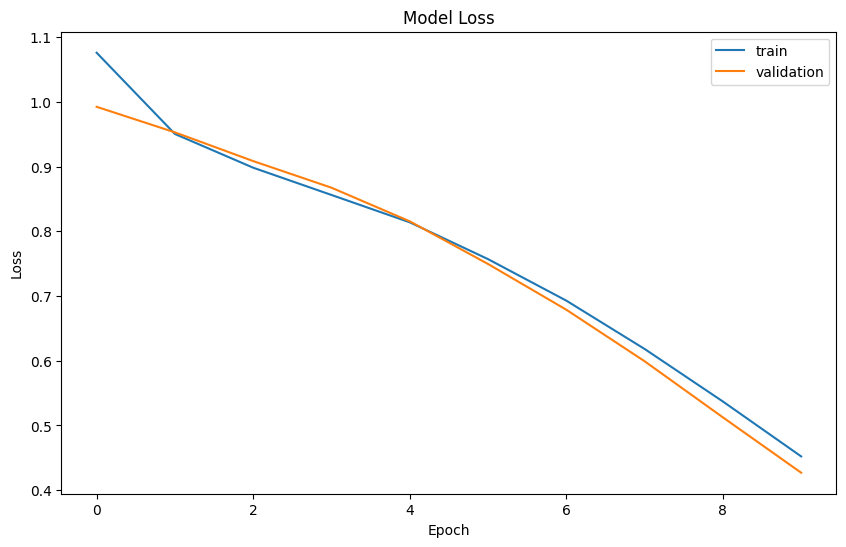

In [ ]:
def simple_rnn_example():
    # Generate sequence data
    def generate_sequence(n_samples=1000, sequence_length=20):
        X = np.zeros((n_samples, sequence_length))
        y = np.zeros((n_samples,))

        for i in range(n_samples):
            # Generate random sequence
            sequence = np.random.choice([-1, 1], size=sequence_length)
            X[i] = sequence
            # Target is product of last three values
            y[i] = np.prod(sequence[-3:])

        return X, y

    # Generate data
    X, y = generate_sequence()

    # Reshape input for RNN [samples, time steps, features]
    X = X.reshape((X.shape[0], X.shape[1], 1))

    # Create model
    model = Sequential([
        SimpleRNN(32, input_shape=(20, 1)),
        Dense(1)
    ])

    # Compile model
    model.compile(optimizer='adam', loss='mse')

    # Train model
    history = model.fit(X, y, validation_split=0.2, epochs=10, batch_size=32)

    # Plot training history
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='validation')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

simple_rnn_example()

## 2. LSTM Networks

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.1173 - val_loss: 0.0107
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0163 - val_loss: 0.0152
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0121 - val_loss: 0.0125
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0115 - val_loss: 0.0132
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0118 - val_loss: 0.0112
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0121 - val_loss: 0.0124
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0109 - val_loss: 0.0113
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0119 - val_loss: 0.0110
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0113 - val_loss: 0.0122
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0117 - val_loss: 0.0105
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0118 - val_loss: 0.0132
Epoch 12/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0

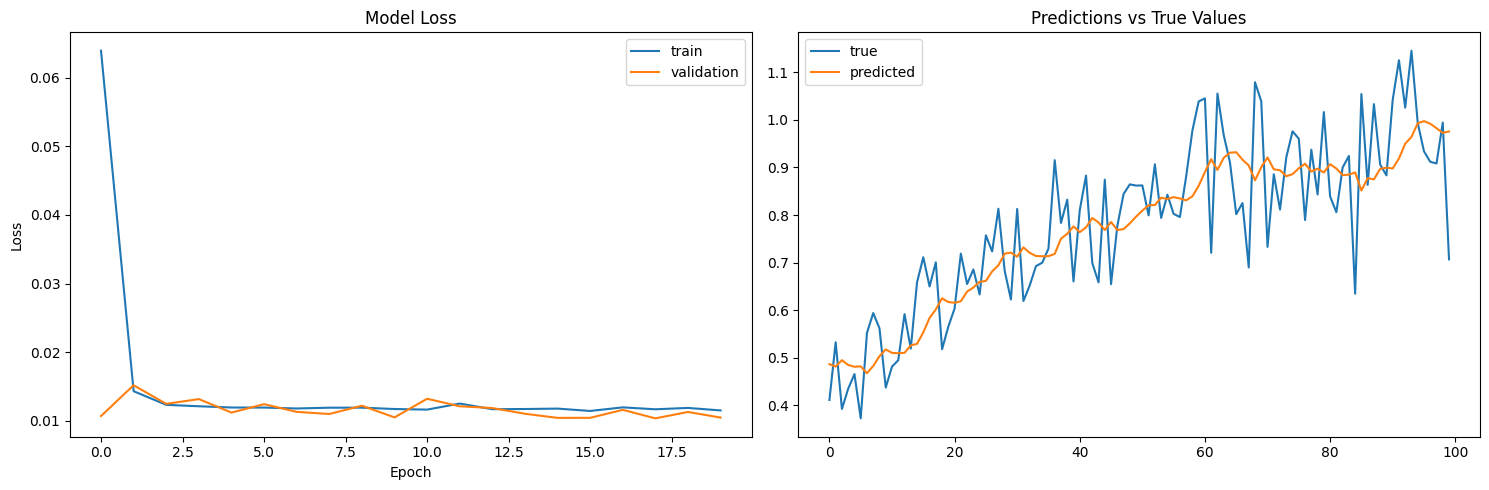

In [ ]:
def lstm_example():
    # Generate time series data
    def generate_time_series(n_samples=1000):
        time = np.linspace(0, 100, n_samples)
        # Generate sinusoidal signal with noise
        signal = np.sin(0.1 * time) + np.random.normal(0, 0.1, n_samples)
        return time, signal

    # Generate data
    time, signal = generate_time_series()

    # Create sequences
    def create_sequences(data, seq_length):
        X = []
        y = []
        for i in range(len(data) - seq_length):
            X.append(data[i:(i + seq_length)])
            y.append(data[i + seq_length])
        return np.array(X), np.array(y)

    # Prepare sequences
    seq_length = 50
    X, y = create_sequences(signal, seq_length)
    X = X.reshape((X.shape[0], X.shape[1], 1))

    # Create LSTM model
    model = Sequential([
        LSTM(50, input_shape=(seq_length, 1)),
        Dense(1)
    ])

    # Compile model
    model.compile(optimizer='adam', loss='mse')

    # Train model
    history = model.fit(X, y, validation_split=0.2, epochs=20, batch_size=32)

    # Make predictions
    predictions = model.predict(X)

    # Plot results
    plt.figure(figsize=(15, 5))

    # Training history
    plt.subplot(121)
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='validation')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Predictions
    plt.subplot(122)
    plt.plot(y[:100], label='true')
    plt.plot(predictions[:100], label='predicted')
    plt.title('Predictions vs True Values')
    plt.legend()

    plt.tight_layout()
    plt.show()

lstm_example()

## 3. GRU Networks


Training SimpleRNN...

Training LSTM...

Training GRU...


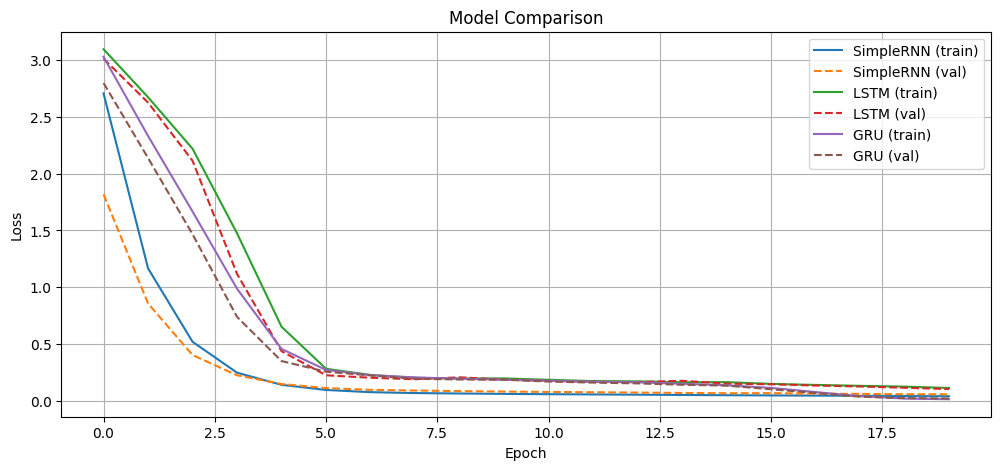

In [ ]:
def compare_architectures():
    # Generate sequence data
    def generate_data(n_samples=1000, seq_length=20):
        X = np.random.randn(n_samples, seq_length, 1)
        y = np.sum(X[:, -3:, 0], axis=1)
        return X, y

    # Generate data
    X, y = generate_data()

    # Create models
    def create_rnn_model():
        return Sequential([
            SimpleRNN(32, input_shape=(20, 1)),
            Dense(1)
        ])

    def create_lstm_model():
        return Sequential([
            LSTM(32, input_shape=(20, 1)),
            Dense(1)
        ])

    def create_gru_model():
        return Sequential([
            GRU(32, input_shape=(20, 1)),
            Dense(1)
        ])

    # Train and evaluate models
    models = {
        'SimpleRNN': create_rnn_model(),
        'LSTM': create_lstm_model(),
        'GRU': create_gru_model()
    }

    histories = {}
    for name, model in models.items():
        print(f"\nTraining {name}...")
        model.compile(optimizer='adam', loss='mse')
        histories[name] = model.fit(X, y, validation_split=0.2,
                                   epochs=20, batch_size=32, verbose=0)

    # Plot results
    plt.figure(figsize=(12, 5))

    for name, history in histories.items():
        plt.plot(history.history['loss'], label=f'{name} (train)')
        plt.plot(history.history['val_loss'], '--', label=f'{name} (val)')

    plt.title('Model Comparison')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

compare_architectures()

## Practical Exercises

In [ ]:
# Exercise 1: Text Generation

def text_generation_exercise():
    # Sample text
    text = """
    The quick brown fox jumps over the lazy dog.
    A quick brown dog jumps over the lazy fox.
    The lazy brown fox sleeps under the quick dog.
    A lazy dog sleeps under the quick brown fox.
    """

    print("Task: Create a character-level text generation model")
    print("1. Preprocess text data")
    print("2. Create character sequences")
    print("3. Build and train RNN model")
    print("4. Generate new text")

    # Your code here

text_generation_exercise()

In [ ]:
# Exercise 2: Time Series Forecasting

def time_series_exercise():
    # Generate synthetic time series
    np.random.seed(42)
    t = np.linspace(0, 100, 1000)
    trend = 0.1 * t
    seasonal = 2 * np.sin(0.1 * t) + np.sin(0.01 * t)
    noise = np.random.normal(0, 0.2, len(t))
    signal = trend + seasonal + noise

    plt.figure(figsize=(12, 4))
    plt.plot(t, signal)
    plt.title('Time Series Data')
    plt.show()

    print("Task: Create a time series forecasting model")
    print("1. Prepare sequences")
    print("2. Build LSTM/GRU model")
    print("3. Make predictions")
    print("4. Evaluate results")

    # Your code here

time_series_exercise()

## MCQ Quiz

1. What is the main advantage of RNNs?
   - a) Fast training
   - b) Handle variable length sequences
   - c) Low memory usage
   - d) Simple architecture

2. What problem do LSTMs solve?
   - a) Slow training
   - b) Vanishing gradients
   - c) High memory usage
   - d) Complex architecture

3. What is a GRU?
   - a) Type of CNN
   - b) Simplified LSTM
   - c) Activation function
   - d) Loss function

4. Which is NOT a gate in LSTM?
   - a) Input gate
   - b) Output gate
   - c) Forget gate
   - d) Update gate

5. What is backpropagation through time?
   - a) Time series prediction
   - b) RNN training algorithm
   - c) Sequence generation
   - d) Data preprocessing

6. When should you use bidirectional RNNs?
   - a) Time series prediction
   - b) Text generation
   - c) Sequence classification
   - d) Image processing

7. What is the purpose of the forget gate?
   - a) Add new information
   - b) Remove old information
   - c) Combine information
   - d) Transform information

8. Which architecture is fastest to train?
   - a) SimpleRNN
   - b) LSTM
   - c) GRU
   - d) Bidirectional RNN

9. What is teacher forcing?
   - a) Data augmentation
   - b) Training technique
   - c) Regularization method
   - d) Activation function

10. Which is true about RNN state?
    - a) Fixed size
    - b) Variable size
    - c) No state
    - d) Random state

Answers: 1-b, 2-b, 3-b, 4-d, 5-b, 6-c, 7-b, 8-a, 9-b, 10-a